# Class 3 HW Part 1: numpy and scipy
Begin by importing the libraries that you'll need for today: numpy, matplotlib, pandas, and seaborn.

## <font color = blue>Problem 1: a few basic problems on creating numpy arrays </font>
#### 1a.) Create a 10x5 numpy array "x" filled with ones, and print the data type of the first value of the first element.

In [142]:
#hint: is there a numpy function that makes this easier?
x =

#### 1b.) Find two separate ways to create the same matrix "x", containing ints instead of floats

In [143]:
#hint: there are more than two ways! Just pick the two that are easiest for you.


#### 1c.) Reassign x to a 1D array of 50 evenly spaced elements between 2 and 20, inclusive.

#### 1d.) Reassign x to a 1D array of 50 evenly spaced elements on a log scale between 2 and 20, exclusive.

## <font color = blue> Problem 2: using numpy and matplotlib to create and view some fake data: a noisy sin wave </font>
#### 2a.) Using np.linspace, create a 1D array "t" containing 1000 evenly spaced elements between 0 and 1, exclusive. Print the first 50 elements to check that your 1D array has values incrementing by 0.001.

#### 2b.) Using numpy's sin function, create a sin wave equal to $sin = sin(2\pi * (4*t))$, and a 1D array "noise", the same shape as your sin array,  filled with random float values between -1 and 1. Set a third array "noisy_sin" = <code>sin + noise</code>.  

In [144]:
#hint: use np.pi for your sin wave
#hint: randint, which lets you input a range, will only output integers
#you can normalize to [-1,1] via 2*(x-x.min()/x.max()-x.min())-1


 #### 2d.) In two plots (use subplots), plot <code>(t, sin)</code> in red and <code>(t, noisysin)</code> in blue. Title plots appropriately, including the frequency of the wave that you've generated!

## <font color = blue> Problem 3: Using SciPy to construct/apply a filter </font>
### Before begining, the problem, go back up to your first cell and import signal from scipy.
#### 3a.) Using SciPy.signal's butterworth filter function (scipy.signal.butter: documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)), create a <font color = red>2nd order</font>,<font color = red> low-pass</font>,<font color = red> analog</font> filter with a cutoff frequency of <font color = red>10 rad/s</font>.

In [145]:
#hint: signal.butter returns TWO outputs - you'll want to set it equal to two
#comma-separated variables. This is demonstrated clearly in the documentation!


#### 3b.) Using SciPy.signal's freq function (documentation [here](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.freqs.html)), to compute the frequency response of the filter that you generated in 3a.

In [138]:
#Similarly, the documentation givesa very thorough example!

w, h = signal.freqs(b,a)

#### 3c.) Passing the input <code>(w, 20 * np.log10(abs(h)))</code> into plt.plot (and setting the x-axis to logscale) or plt.semilogx, plot your filter in log-scale. Title and label axes appropriately. Use matplotlib's "grid" method to include a grid background from <font color = red> both </font> the x and y axes.

Text(0.5, 0, 'Frequency (rad/s)')

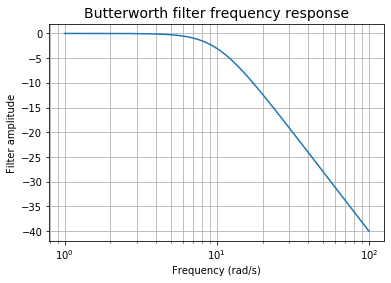

In [139]:
#hint: we can plot in log scale use either xscale('log') OR the semilogx function.
plt.semilogx(w, 20*np.log10(abs(h)))
plt.grid(which='both', axis='both')

plt.title('Butterworth filter frequency response',fontsize = 14)
plt.ylabel('Filter amplitude')
plt.xlabel('Frequency (rad/s)')

#### 3d.) Once again, use signal.butter() to create a filter. This time, create a <font color=red>second order, low-pass </font> <font color=orange> digital filter</font><font color=red> with a frequency cutoff of 10Hz</font>  filter. In this case, the frequency cutoff must be __normalized__ . We can do this by dividing our desired cutoff frequency in __Hz__ by half the sampling frequency! As each timestep in "t" = 0.001, our sampling frequency is 1000.
<br> 
#### To make this code readable to future users, assign the sampling frequency to a variable "fs" and comment your code well.

In [140]:
b, a = signal.butter(2,10/(fs/2),
                     'low') #10Hz cutoff normalized for digital filter

#### 3e.) Finally, by passing the two outputs of your digital filter above and the signal you want filtered into signal.filtfilt(), create a variable called "filtered_signal" that is equal to the noisy sin wave with your digital filter applied to it! 
<br><br>
#### Using 4x1 subplots, plot your (1) initial sin wave in blue, (2) your noisy sin wave in orange, (3) your filtered noisy sin wave in green, and (4) all three overlaid.

Text(0.5, 1.0, 'Combined Waves')

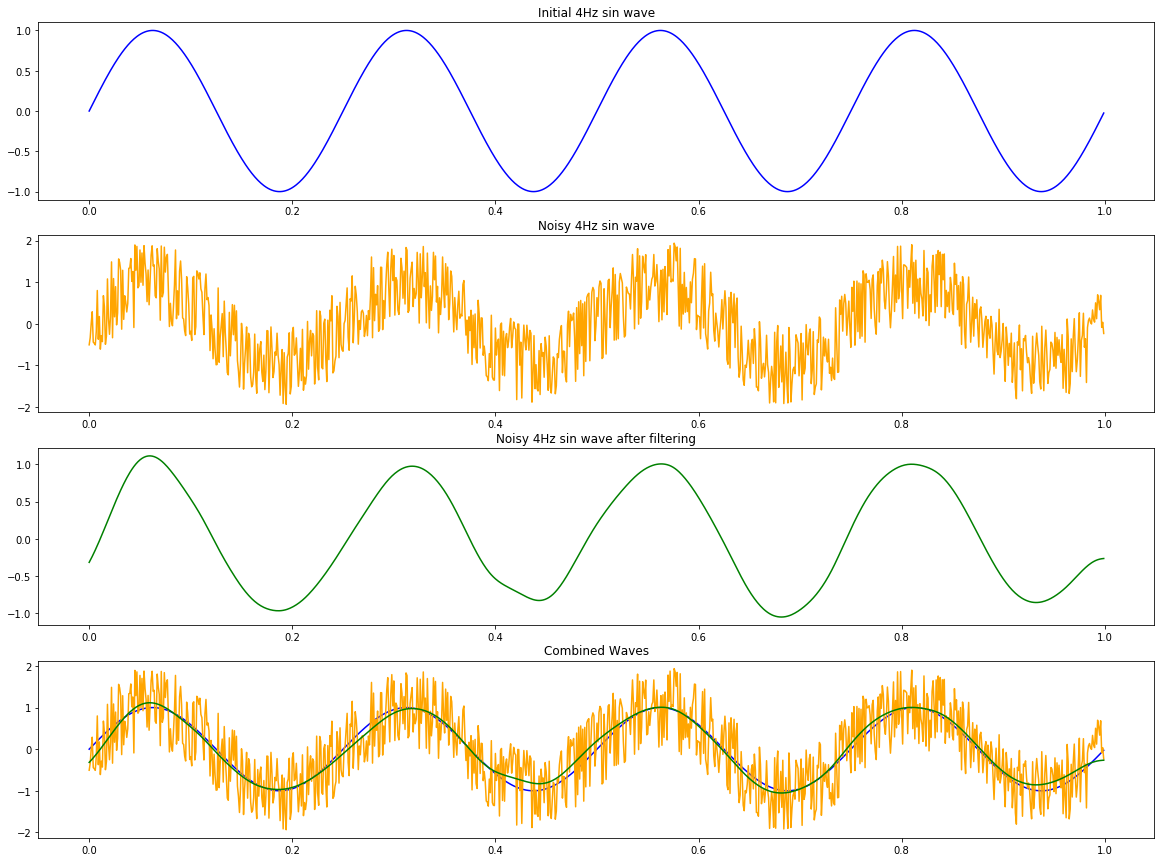

In [141]:
filtered_sin = signal.filtfilt(b, a, noisy_sin)
fix, ax = plt.subplots(4,1,figsize=(20,15))

ax[0].plot(t, sin, color='blue')
ax[0].set_title('Initial 4Hz sin wave')

ax[1].plot(t, noisy_sin, color='orange')
ax[1].set_title('Noisy 4Hz sin wave')

ax[2].plot(t, filtered_sin,color='green')
ax[2].set_title('Noisy 4Hz sin wave after filtering')

ax[3].plot(t, sin, color='blue')
ax[3].plot(t, noisy_sin, color='orange')
ax[3].plot(t, filtered_sin, color='green')
ax[3].set_title('Combined Waves')